In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [167]:
def increase_contrast(image, factor):
    # Convert image to float in the range of 0-1
    image = image.astype(float) / 255.0
    
    # Apply contrast adjustment
    adjusted_image = (image - 0.5) * factor + 0.5
    
    # Clip the pixel values to the valid range of 0-1
    adjusted_image = np.clip(adjusted_image, 0, 1)
    
    # Convert back to the original data type (e.g., uint8)
    adjusted_image = (adjusted_image * 255).astype(np.uint8)
    
    return adjusted_image

def equalize_image(img):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # image = cv2.equalizeHist(image)

    # _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # image = clahe.apply(image)





    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)



    return enhanced_img

In [2]:
test_images = glob("/home/mykang/mmsegmentation/data/Satellite/img_dir/test/*.png")
cnt=0

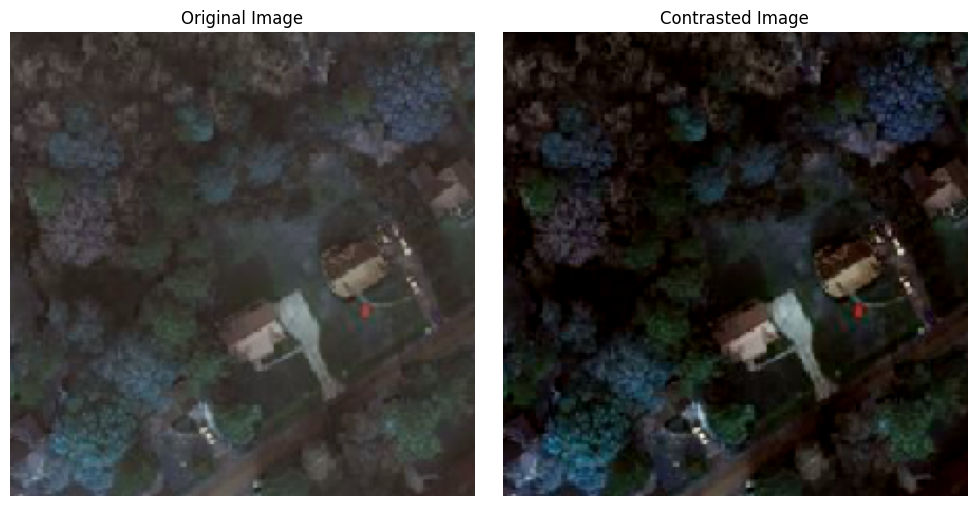

In [187]:
# Load your original and contrasted images
original_image = cv2.imread(test_images[cnt])  # Replace with your image loading code
contrasted_image = increase_contrast(original_image, 1.5)  # Replace with your contrast adjustment function

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the contrasted image in the second subplot
axs[1].imshow(contrasted_image)
axs[1].set_title('Contrasted Image')

# Remove axis labels
for ax in axs:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

cnt += 1

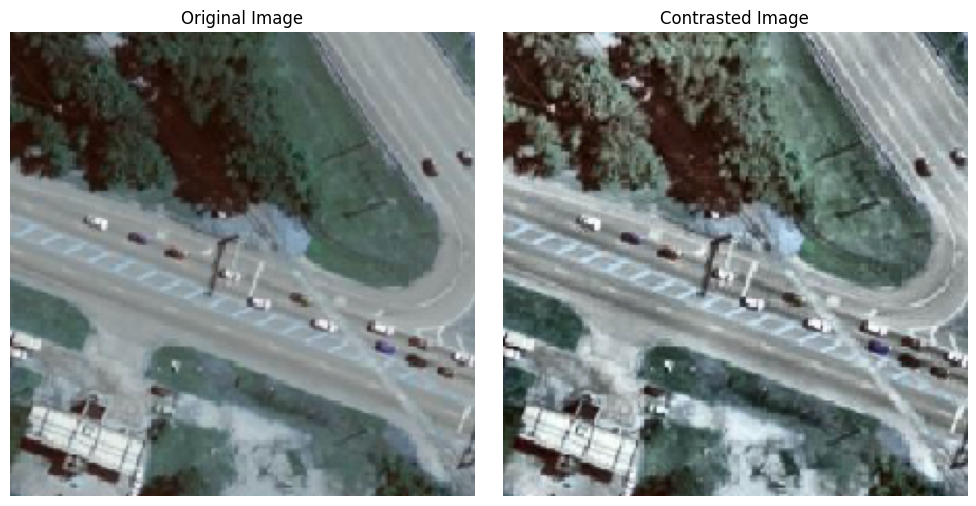

In [171]:
import cv2
# Load your original and contrasted images
original_image = cv2.imread(test_images[cnt])  # Replace with your image loading code
equalized_image = equalize_image(original_image)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the contrasted image in the second subplot
axs[1].imshow(equalized_image)
axs[1].set_title('Contrasted Image')

# Remove axis labels
for ax in axs:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

cnt += 100